In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [146]:
filename = "transaction_data.json"

main_df = pd.read_json(filename)

In [147]:
main_df

,address,birthdate,mail,name,sex,username,transaction_items,transaction_value,transaction_date
0,USNS Wagner\nFPO AE 00917,1926/03/11,watsonbrenda@gmail.com,Jennifer Campbell,F,veronicawells,"Exotic Extras,Beef Chicharon,(x4)",5196,2022/01/12
1,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"Exotic Extras,Beef Chicharon,(x3);HealthyKid 3...",12056,2022/01/12
2,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Gummy Vitamins,(x3);HealthyKid 3...",5500,2022/01/08
3,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Yummy Vegetables,(x1)",500,2022/01/10
4,"33911 Hansen Loaf\nWest Sandra, ND 54188",1949/09/27,michael78@yahoo.com,Kristen Cooper,F,qhernandez,"Candy City,Orange Beans,(x3);Candy City,Gummy ...",2697,2022/01/24
...,...,...,...,...,...,...,...,...,...
83031,"96081 Harrison Brooks\nJenniferbury, MA 02124",2019/10/26,christina55@hotmail.com,Tammy Byrd,F,kmcconnell,"Exotic Extras,Kimchi and Seaweed,(x2);HealthyK...",3588,2022/06/05
83032,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"HealthyKid 3+,Yummy Vegetables,(x1);Exotic Ext...",2095,2022/06/12
83033,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"Candy City,Orange Beans,(x4);Candy City,Gummy ...",3396,2022/06/15
83034,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"HealthyKid 3+,Nutrional Milk,(x2);Candy City,G...",4280,2022/06/09


In [148]:
rawitem_df = main_df.drop("transaction_items", axis=1).join(
             main_df.transaction_items
             .str
             .split(";", expand=True)
             .stack()
             .reset_index(drop=True, level=1)
             .rename('transaction_items')           
             )

In [149]:
rawitem_df

,address,birthdate,mail,name,sex,username,transaction_value,transaction_date,transaction_items
0,USNS Wagner\nFPO AE 00917,1926/03/11,watsonbrenda@gmail.com,Jennifer Campbell,F,veronicawells,5196,2022/01/12,"Exotic Extras,Beef Chicharon,(x4)"
1,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,12056,2022/01/12,"Exotic Extras,Beef Chicharon,(x3)"
1,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,12056,2022/01/12,"HealthyKid 3+,Nutrional Milk,(x4)"
1,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,12056,2022/01/12,"Candy City,Orange Beans,(x1)"
2,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,5500,2022/01/08,"HealthyKid 3+,Gummy Vitamins,(x3)"
...,...,...,...,...,...,...,...,...,...
83034,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,4280,2022/06/09,"HealthyKid 3+,Nutrional Milk,(x2)"
83034,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,4280,2022/06/09,"Candy City,Gummy Worms,(x2)"
83035,"PSC 1089, Box 3720\nAPO AE 08973",2012/04/30,xjones@hotmail.com,Stephanie Russell,F,cmcdowell,2639,2022/06/03,"HealthyKid 3+,Nutrional Milk,(x1)"
83035,"PSC 1089, Box 3720\nAPO AE 08973",2012/04/30,xjones@hotmail.com,Stephanie Russell,F,cmcdowell,2639,2022/06/03,"Candy City,Gummy Worms,(x3)"


In [150]:
rawitem_df["Month"] = pd.DatetimeIndex(rawitem_df["transaction_date"]).month

In [151]:
rawitem_df["Quantity"] = rawitem_df.transaction_items.str.split(",", expand=True)[2]
rawitem_df["Real Quantity"] = rawitem_df["Quantity"].str.extract("(\d+)").astype(int)
rawitem_df["Item"] = rawitem_df.transaction_items.str.split(",", expand=True)[1]
rawitem_df = rawitem_df.drop(["Quantity"], axis=1)

In [152]:
rawitem_df

,address,birthdate,mail,name,sex,username,transaction_value,transaction_date,transaction_items,Month,Real Quantity,Item
0,USNS Wagner\nFPO AE 00917,1926/03/11,watsonbrenda@gmail.com,Jennifer Campbell,F,veronicawells,5196,2022/01/12,"Exotic Extras,Beef Chicharon,(x4)",1,4,Beef Chicharon
1,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,12056,2022/01/12,"Exotic Extras,Beef Chicharon,(x3)",1,3,Beef Chicharon
1,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,12056,2022/01/12,"HealthyKid 3+,Nutrional Milk,(x4)",1,4,Nutrional Milk
1,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,12056,2022/01/12,"Candy City,Orange Beans,(x1)",1,1,Orange Beans
2,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,5500,2022/01/08,"HealthyKid 3+,Gummy Vitamins,(x3)",1,3,Gummy Vitamins
...,...,...,...,...,...,...,...,...,...,...,...,...
83034,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,4280,2022/06/09,"HealthyKid 3+,Nutrional Milk,(x2)",6,2,Nutrional Milk
83034,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,4280,2022/06/09,"Candy City,Gummy Worms,(x2)",6,2,Gummy Worms
83035,"PSC 1089, Box 3720\nAPO AE 08973",2012/04/30,xjones@hotmail.com,Stephanie Russell,F,cmcdowell,2639,2022/06/03,"HealthyKid 3+,Nutrional Milk,(x1)",6,1,Nutrional Milk
83035,"PSC 1089, Box 3720\nAPO AE 08973",2012/04/30,xjones@hotmail.com,Stephanie Russell,F,cmcdowell,2639,2022/06/03,"Candy City,Gummy Worms,(x3)",6,3,Gummy Worms


In [153]:
ItemCount_df = rawitem_df.groupby(["Month", "Item"],as_index = False)["Real Quantity"].sum().pivot("Month", "Item").fillna(0)
ItemCount_df

Real Quantity                                                \
Item  Beef Chicharon Gummy Vitamins Gummy Worms Kimchi and Seaweed   
Month                                                                
1               9665           9681        9559               9676   
2              10001           9980        9996               9949   
3               9816          10145        9986               9967   
4               9890           9842       10043               9921   
5              10028           9948        9801               9773   
6               9902           9980        9934              10104   

                                                    
Item  Nutrional Milk Orange Beans Yummy Vegetables  
Month                                               
1               9727         9774             9959  
2               9691        10037            10256  
3               9876         9611             9896  
4               9786         9914             9861  
5               9881         9964             9735  
6               9767        10106             9722

Text(0.5, 1.0, '# of Items Bought Every Month')

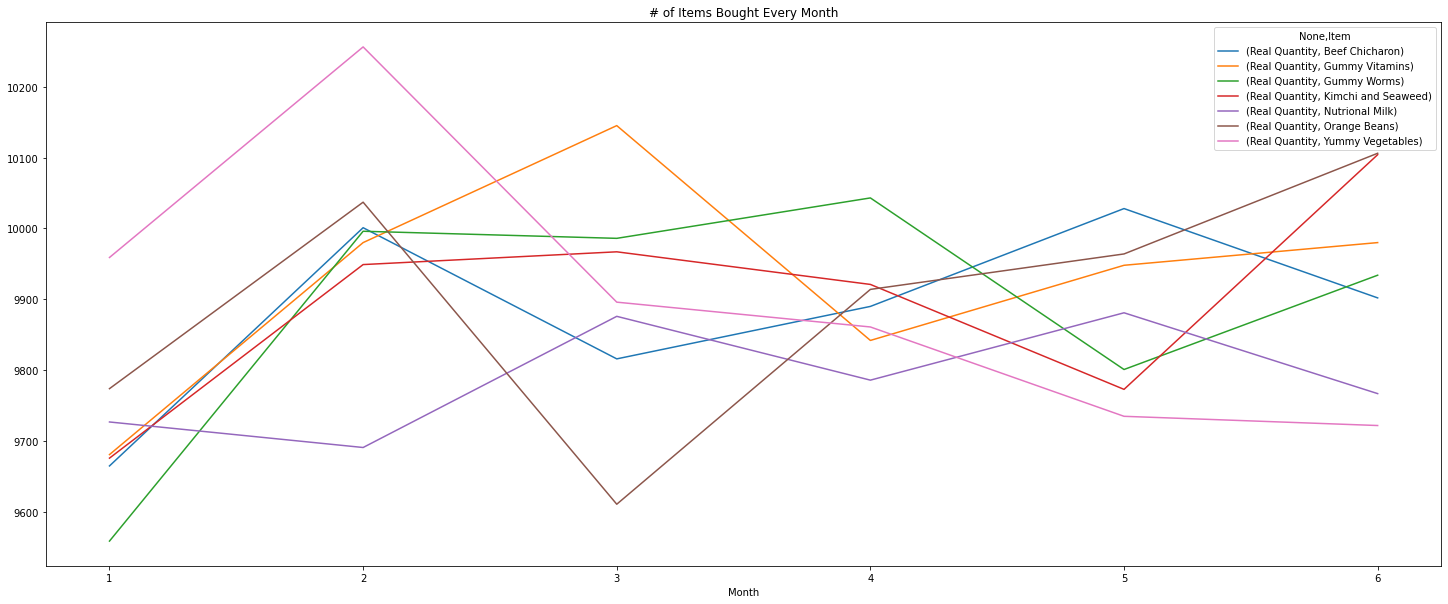

In [154]:
ItemCount_df.plot.line(figsize=(25,10))
plt.title("# of Items Bought Every Month")

In [155]:
############################################################################################################################

In [162]:
def split_trans_items(x):
    order = x.split(';')
    item_list = []

    for pack in order:
        tmp_list = pack.split(',')
        item_list.append({"Category":tmp_list[0],"Item":tmp_list[1],"Quantity":[int(i) for i in tmp_list[-1] if i.isdigit()][0]})

    return item_list

In [163]:
main_df["transaction_date"] = pd.to_datetime(main_df["transaction_date"], format="%Y/%m/%d")

main_df["Parsed Items"] = main_df["transaction_items"].apply(split_trans_items)

In [164]:
values = pd.DataFrame(main_df[main_df["Parsed Items"].apply(len)==1]) 
values["Item Dictionary"] = values["Parsed Items"].apply(lambda x: x[0])
values["Category"] = values["Item Dictionary"].apply(lambda x: x["Category"])
values["Item"] = values["Item Dictionary"].apply(lambda x: x["Item"])
values["Quantity"] = values["Item Dictionary"].apply(lambda x: x["Quantity"])
values = values.drop_duplicates(subset="Item", keep="first")

values["Price Value"] = values["transaction_value"] / values["Quantity"]

ItemSale_df = pd.DataFrame(values[["Category", "Item","Price Value"]])
ItemSale_df

,Category,Item,Price Value
0,Exotic Extras,Beef Chicharon,1299.0
3,HealthyKid 3+,Yummy Vegetables,500.0
6,Exotic Extras,Kimchi and Seaweed,799.0
8,Candy City,Gummy Worms,150.0
11,HealthyKid 3+,Gummy Vitamins,1500.0
18,HealthyKid 3+,Nutrional Milk,1990.0
19,Candy City,Orange Beans,199.0


In [165]:
MonthlySales = ItemCount_df.copy()

In [166]:
for x in ItemCount_df["Real Quantity"].columns:
    multiplier = ItemSale_df.loc[ItemSale_df["Item"] == x]["Price Value"].values[0]
    MonthlySales[x] = ItemCount_df["Real Quantity"][x] * multiplier

MonthlySales = MonthlySales.drop(columns=["Real Quantity"])
MonthlySales

,Beef Chicharon,Gummy Vitamins,Gummy Worms,Kimchi and Seaweed,Nutrional Milk,Orange Beans,Yummy Vegetables
Item,,,,,,,
Month,,,,,,,
1,12554835.0,14521500.0,1433850.0,7731124.0,19356730.0,1945026.0,4979500.0
2,12991299.0,14970000.0,1499400.0,7949251.0,19285090.0,1997363.0,5128000.0
3,12750984.0,15217500.0,1497900.0,7963633.0,19653240.0,1912589.0,4948000.0
4,12847110.0,14763000.0,1506450.0,7926879.0,19474140.0,1972886.0,4930500.0
5,13026372.0,14922000.0,1470150.0,7808627.0,19663190.0,1982836.0,4867500.0
6,12862698.0,14970000.0,1490100.0,8073096.0,19436330.0,2011094.0,4861000.0


Text(0.5, 1.0, 'Item Count per Month')

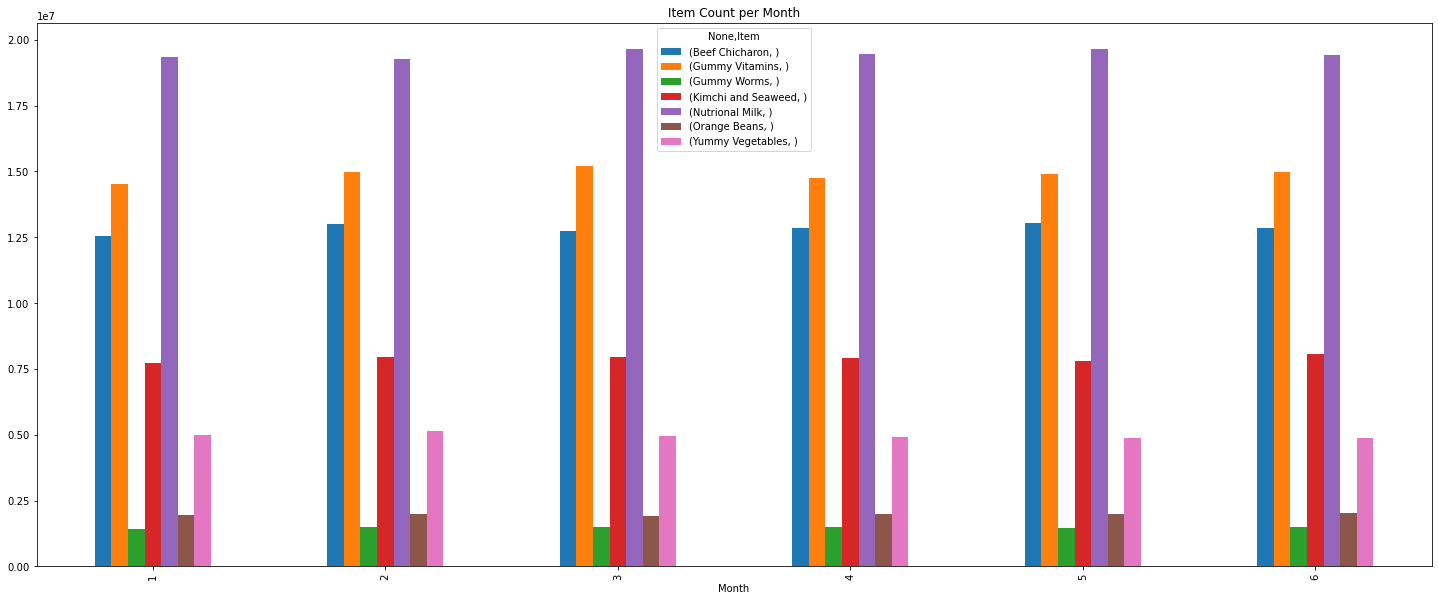

In [167]:
MonthlySales.plot.bar(figsize=(25,10))
plt.title("Item Count per Month")

array([[<AxesSubplot:xlabel='Month'>, <AxesSubplot:xlabel='Month'>,
        <AxesSubplot:xlabel='Month'>, <AxesSubplot:xlabel='Month'>],
       [<AxesSubplot:xlabel='Month'>, <AxesSubplot:xlabel='Month'>,
        <AxesSubplot:xlabel='Month'>, <AxesSubplot:xlabel='Month'>]],
      dtype=object)

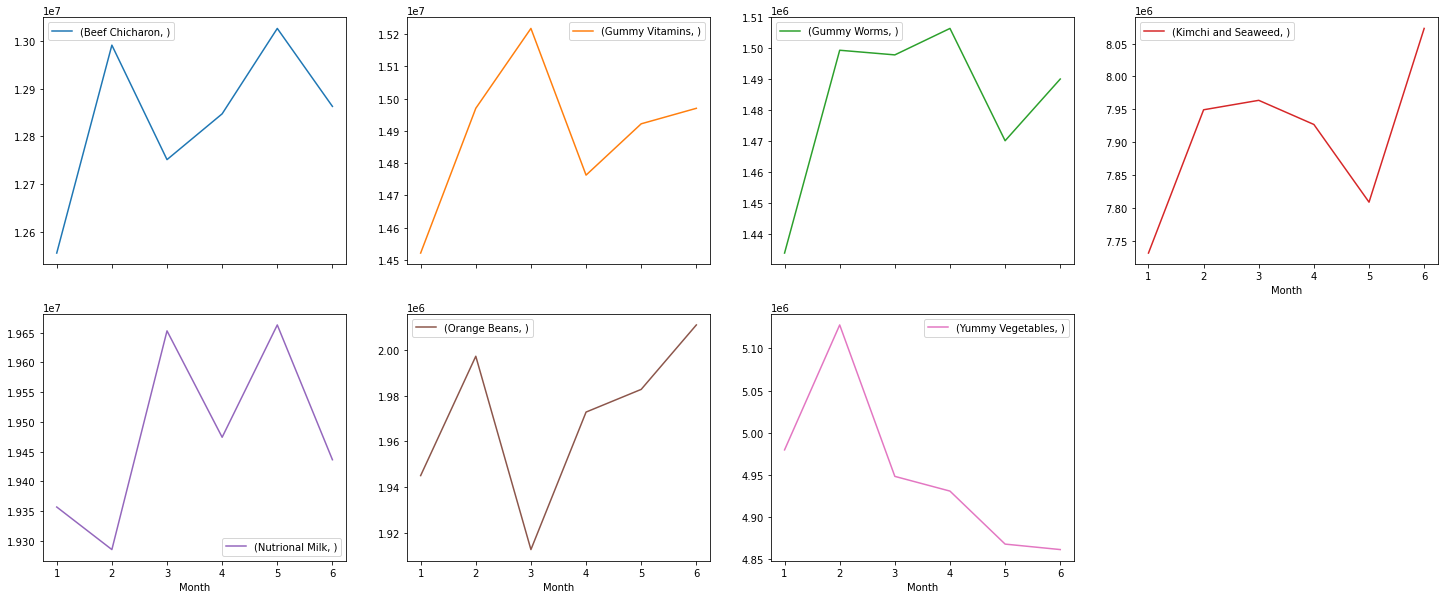

In [168]:
MonthlySales.plot(subplots=True, layout=(2,4), figsize=(25,10))

In [169]:
############################################################################################################################

In [170]:
MonthlyTransactions = pd.pivot_table(
    rawitem_df.drop(columns=['transaction_value']), 
    values='Real Quantity', 
    index=['Month'],
    columns=['name'],
    aggfunc=any,
    fill_value = 0
)

MonthlyTransactions = MonthlyTransactions[MonthlyTransactions.columns].replace([True],1)
MonthlyTransactions

name,Aaron Beasley,Aaron Brewer,Aaron Brown,Aaron Coffey,Aaron Davis,Aaron Escobar,Aaron Flores,Aaron Flowers,Aaron Garrett,Aaron Holder,...,Zachary Richard,Zachary Salinas,Zachary Scott,Zachary Smith,Zachary Torres,Zachary Valentine,Zachary Ware,Zachary Williams,Zachary Wilson,Zachary York
Month,,,,,,,,,,,,,,,,,,,,,
1,0,1,0,1,1,0,1,1,1,0,...,1,0,1,1,0,1,1,1,0,1
2,0,1,0,1,1,1,1,1,1,1,...,1,1,1,1,0,1,1,1,0,1
3,0,1,1,1,0,0,1,0,1,1,...,1,0,1,1,1,1,1,1,0,1
4,1,1,1,1,1,1,1,1,0,1,...,1,1,1,1,1,1,1,1,1,1
5,1,0,1,1,1,1,0,0,1,1,...,1,1,1,1,1,1,1,0,1,1
6,1,1,1,0,1,0,1,1,1,1,...,1,1,1,1,1,1,1,0,1,1


In [171]:
def ifRepeater(x):
    tmp_list = []
    for i in x.index:
        if i==1: tmp_list.append(0)
        else:
            if x[i-1] and x[i]: tmp_list.append(1)
            else: tmp_list.append(0)

    return tmp_list

In [172]:
repeaters = MonthlyTransactions.apply(ifRepeater)
repeaters

name,Aaron Beasley,Aaron Brewer,Aaron Brown,Aaron Coffey,Aaron Davis,Aaron Escobar,Aaron Flores,Aaron Flowers,Aaron Garrett,Aaron Holder,...,Zachary Richard,Zachary Salinas,Zachary Scott,Zachary Smith,Zachary Torres,Zachary Valentine,Zachary Ware,Zachary Williams,Zachary Wilson,Zachary York
Month,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,1,0,1,1,1,0,...,1,0,1,1,0,1,1,1,0,1
3,0,1,0,1,0,0,1,0,1,1,...,1,0,1,1,0,1,1,1,0,1
4,0,1,1,1,0,0,1,0,0,1,...,1,0,1,1,1,1,1,1,0,1
5,1,0,1,1,1,1,0,0,0,1,...,1,1,1,1,1,1,1,0,1,1
6,1,0,1,0,1,0,0,0,1,1,...,1,1,1,1,1,1,1,0,1,1


In [173]:
repeaters_df = repeaters.transpose().apply(pd.value_counts).transpose()[1]
repeaters_df.loc[1] = 0
repeaters_df

Month
1       0.0
2    5172.0
3    5216.0
4    5154.0
5    5110.0
6    5193.0
Name: 1, dtype: float64

Text(0.5, 1.0, '# of Repeaters per month')

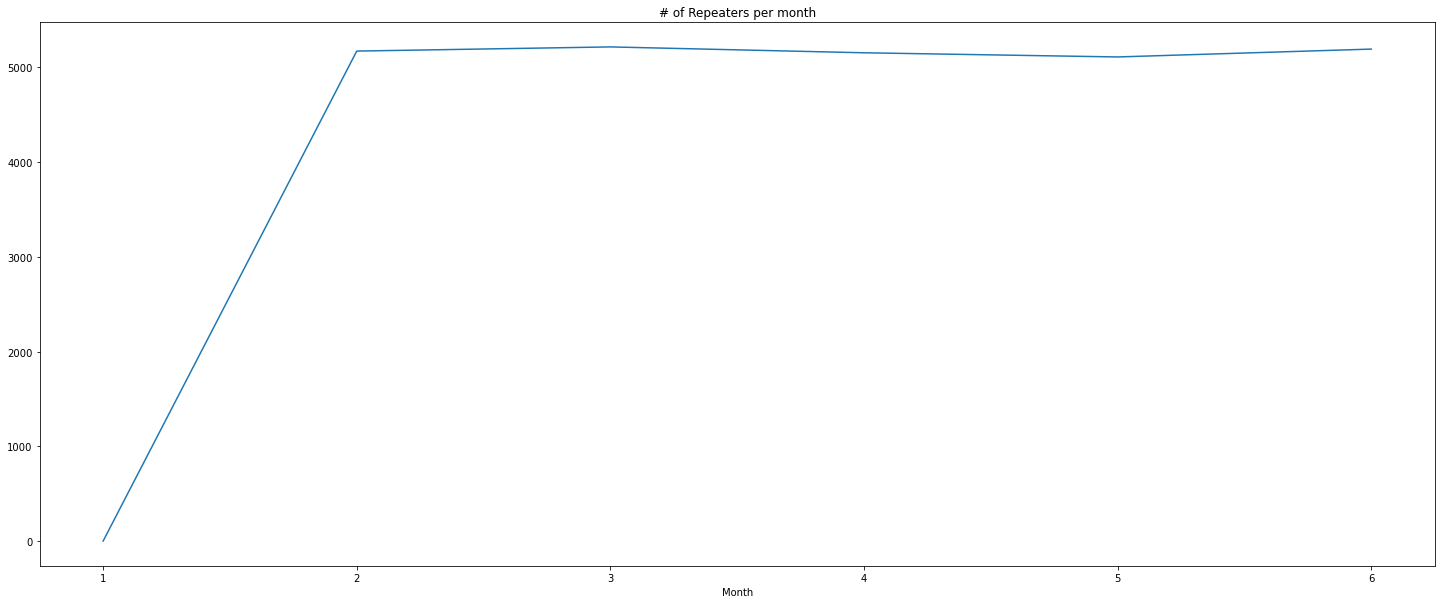

In [174]:
repeaters_df.plot(figsize=(25,10))
plt.title("# of Repeaters per month")

In [175]:
def isInactive(x):
    tmp_list = []
    for i in x.index:
        if i==1: tmp_list.append(0) #every first month is automatically 0 therefore first element of tmp_list = 0
        else:
            if any(x[:i]): #Append 1 to tmp_list if there is any transaction for the previous months of the current month but no transaction in the current month otherwise append 0
                if x[i]==0: tmp_list.append(1) 
                else: tmp_list.append(0)
            else:
                tmp_list.append(0)
    return tmp_list

In [176]:
inactives_df = inactives.transpose().apply(pd.value_counts).transpose()[1]
inactives_df.loc[1] = 0
inactives_df

Month
1       0.0
2    1416.0
3    1747.0
4    1909.0
5    1917.0
6    1835.0
Name: 1, dtype: float64

In [177]:
inactives_df = inactives.transpose().apply(pd.value_counts).transpose()[1]
inactives_df.loc[1] = 0
inactives_df

Month
1       0.0
2    1416.0
3    1747.0
4    1909.0
5    1917.0
6    1835.0
Name: 1, dtype: float64

Text(0.5, 1.0, 'Inactives per month')

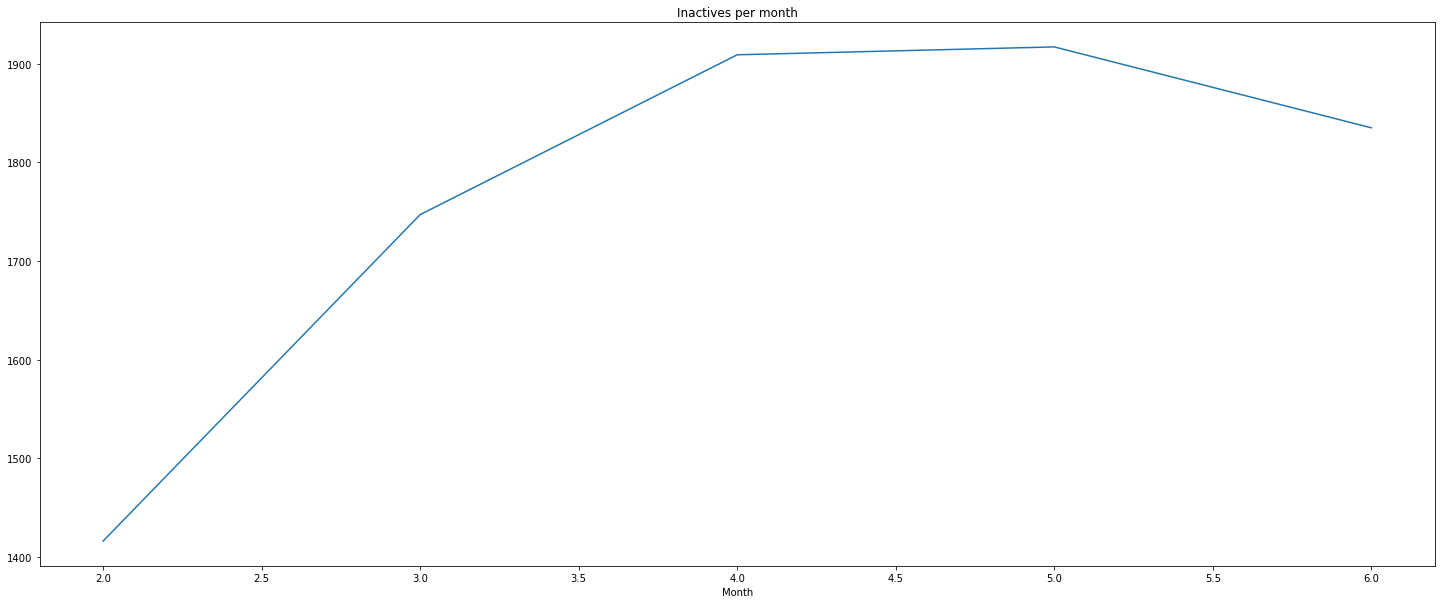

In [178]:
inactives_df.loc[2:].plot(figsize=(25,10))
plt.title("Inactives per month")

In [179]:
def isEngaged(x):
    tmp_list = []
    for i in x.index:
        tmp_list.append(all(x[:i])) #if all previous month and in current month there is a transaction, append 1 to tmp_list otherwise 0
    return [1 if i else 0 for i in tmp_list]

In [180]:
engaged_df = engaged.transpose().apply(pd.value_counts).transpose()[1]
engaged_df.loc[1] = 0
engaged_df

Month
1       0
2    5172
3    4126
4    3289
5    2667
6    2190
Name: 1, dtype: int64

In [181]:
engaged_df = engaged.transpose().apply(pd.value_counts).transpose()[1]
engaged_df.loc[1] = 0
engaged_df

Month
1       0
2    5172
3    4126
4    3289
5    2667
6    2190
Name: 1, dtype: int64

<AxesSubplot:xlabel='Month'>

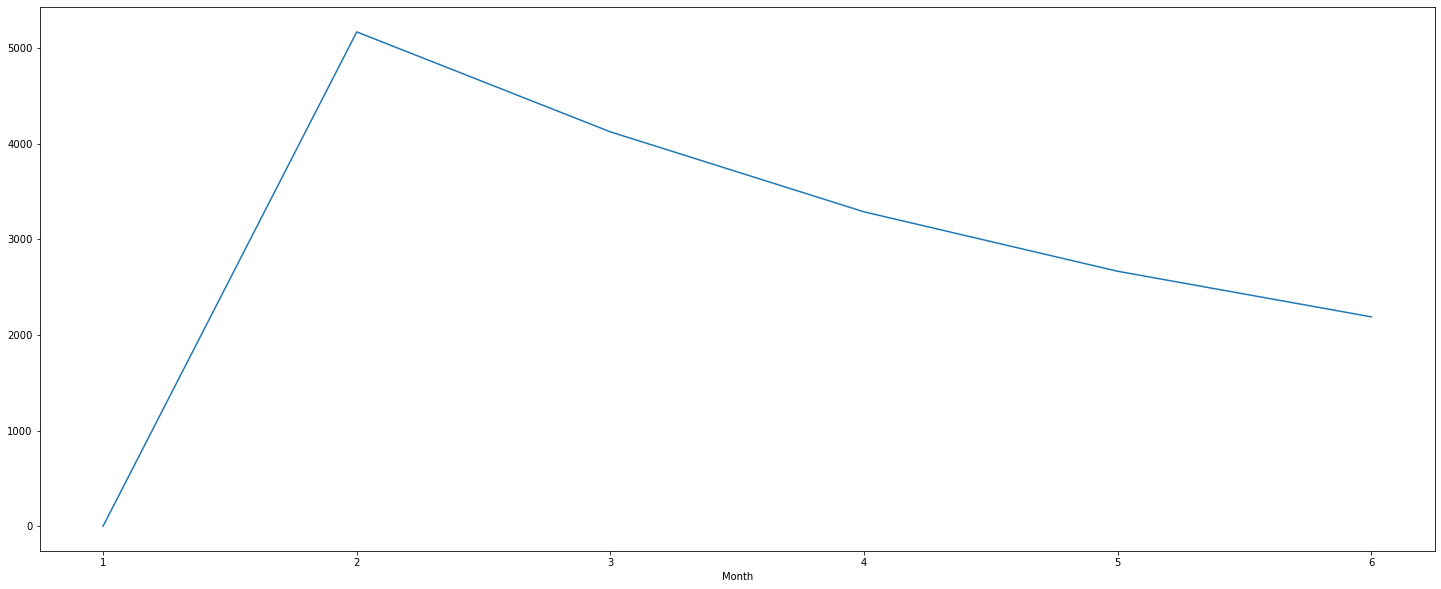

In [182]:
engaged_df.plot(figsize=(25,10))

In [183]:
def isNew(x):
    tmp_list = []
    for i in x.index:
        if any(x[:i]):  #if there is 1 in the list of values before the month
            tmp_list.append(1)
            break
        else:
            tmp_list.append(0)
    while (len(tmp_list) != len(x)): #if the generated list above in the for loop is not same size with given series, populate the list with 0 values until both list are the same length
        tmp_list.append(0)
    return tmp_list

In [184]:
new = MonthlyTransactions.apply(isNew)
new

name,Aaron Beasley,Aaron Brewer,Aaron Brown,Aaron Coffey,Aaron Davis,Aaron Escobar,Aaron Flores,Aaron Flowers,Aaron Garrett,Aaron Holder,...,Zachary Richard,Zachary Salinas,Zachary Scott,Zachary Smith,Zachary Torres,Zachary Valentine,Zachary Ware,Zachary Williams,Zachary Wilson,Zachary York
Month,,,,,,,,,,,,,,,,,,,,,
1,0,1,0,1,1,0,1,1,1,0,...,1,0,1,1,0,1,1,1,0,1
2,0,0,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [185]:
new_df = new.transpose().apply(pd.value_counts).loc[1]
new_df

Month
1    6588
2    1459
3     322
4      96
5      20
6       2
Name: 1, dtype: int64

Text(0.5, 1.0, 'New per month')

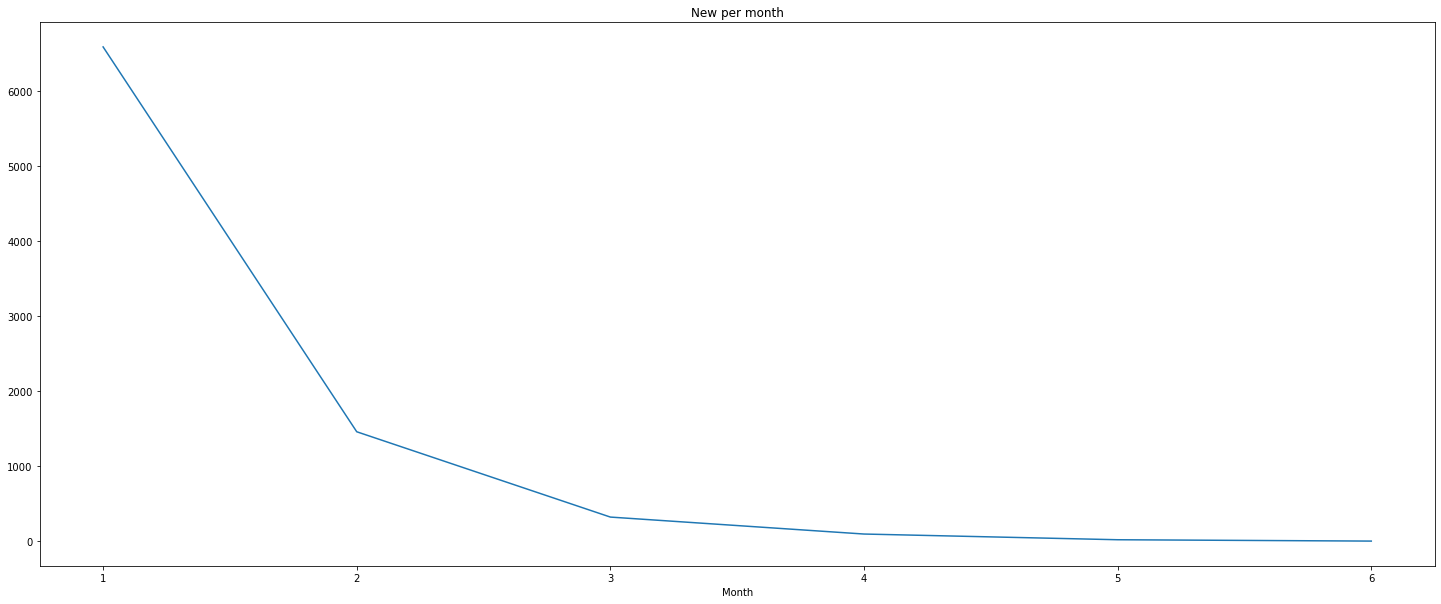

In [186]:
new_df.plot(figsize=(25,10))
plt.title("New per month")

In [187]:
def isNonRepeater(x):
    if x.tolist().count(1)==1: 
        return x  #if input 'x' pd series have only one '1'
    else: 
        return [0]*6  #otherwise return [0,0,0,0,0,0]

In [188]:
nonRepeater = MonthlyTransactions.apply(isNonRepeater) 
nonRepeater

name,Aaron Beasley,Aaron Brewer,Aaron Brown,Aaron Coffey,Aaron Davis,Aaron Escobar,Aaron Flores,Aaron Flowers,Aaron Garrett,Aaron Holder,...,Zachary Richard,Zachary Salinas,Zachary Scott,Zachary Smith,Zachary Torres,Zachary Valentine,Zachary Ware,Zachary Williams,Zachary Wilson,Zachary York
Month,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [189]:
nonRepeater_df = nonRepeater.transpose().apply(pd.value_counts).loc[1]
nonRepeater_df.loc[1] = 0
nonRepeater_df

Month
1    0
2    1
3    5
4    4
5    5
6    2
Name: 1, dtype: int64

Text(0.5, 1.0, 'Non-Repeaters per month')

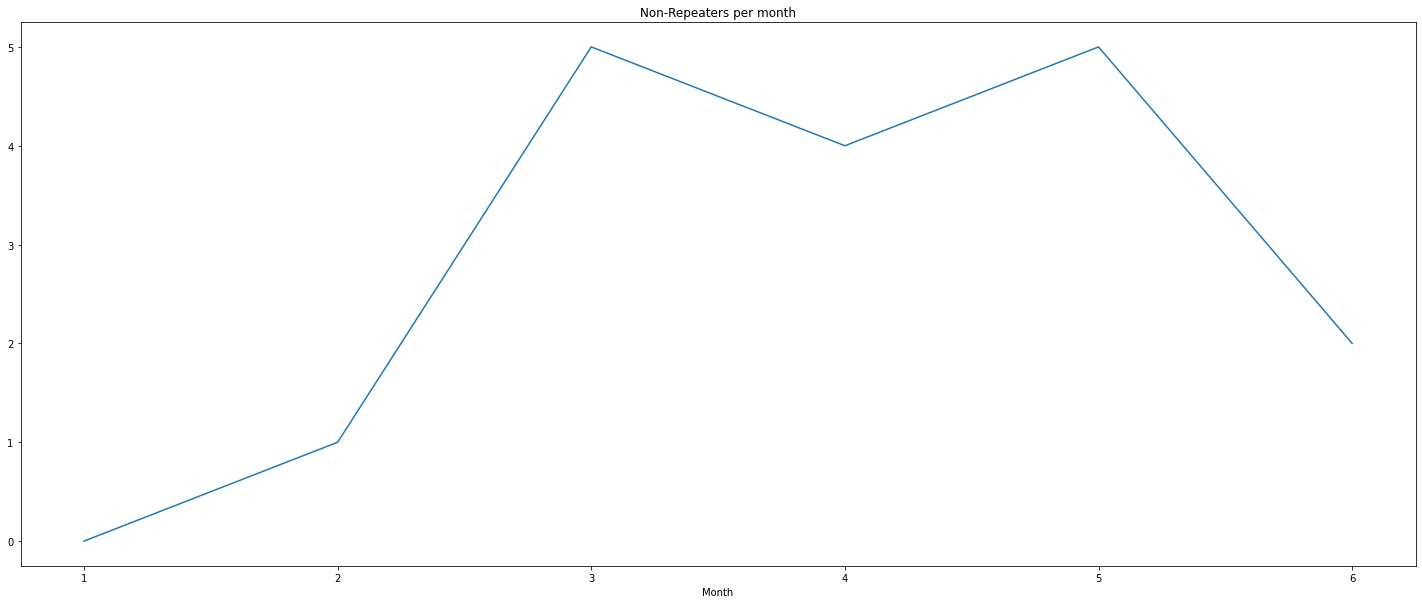

In [190]:
nonRepeater_df.plot(figsize=(25,10))
plt.title("Non-Repeaters per month")

In [191]:
customerStatus_df = pd.DataFrame({
  "Repeater":repeaters_df,
  "Inactive":inactives_df,
  "Engaged":engaged_df,
  "New":new_df,
  "Non Repeater":nonRepeater_df
})

customerStatus_df

,Repeater,Inactive,Engaged,New,Non Repeater
Month,,,,,
1,0.0,0.0,0,6588,0
2,5172.0,1416.0,5172,1459,1
3,5216.0,1747.0,4126,322,5
4,5154.0,1909.0,3289,96,4
5,5110.0,1917.0,2667,20,5
6,5193.0,1835.0,2190,2,2


Text(0.5, 1.0, 'Customer Traffic')

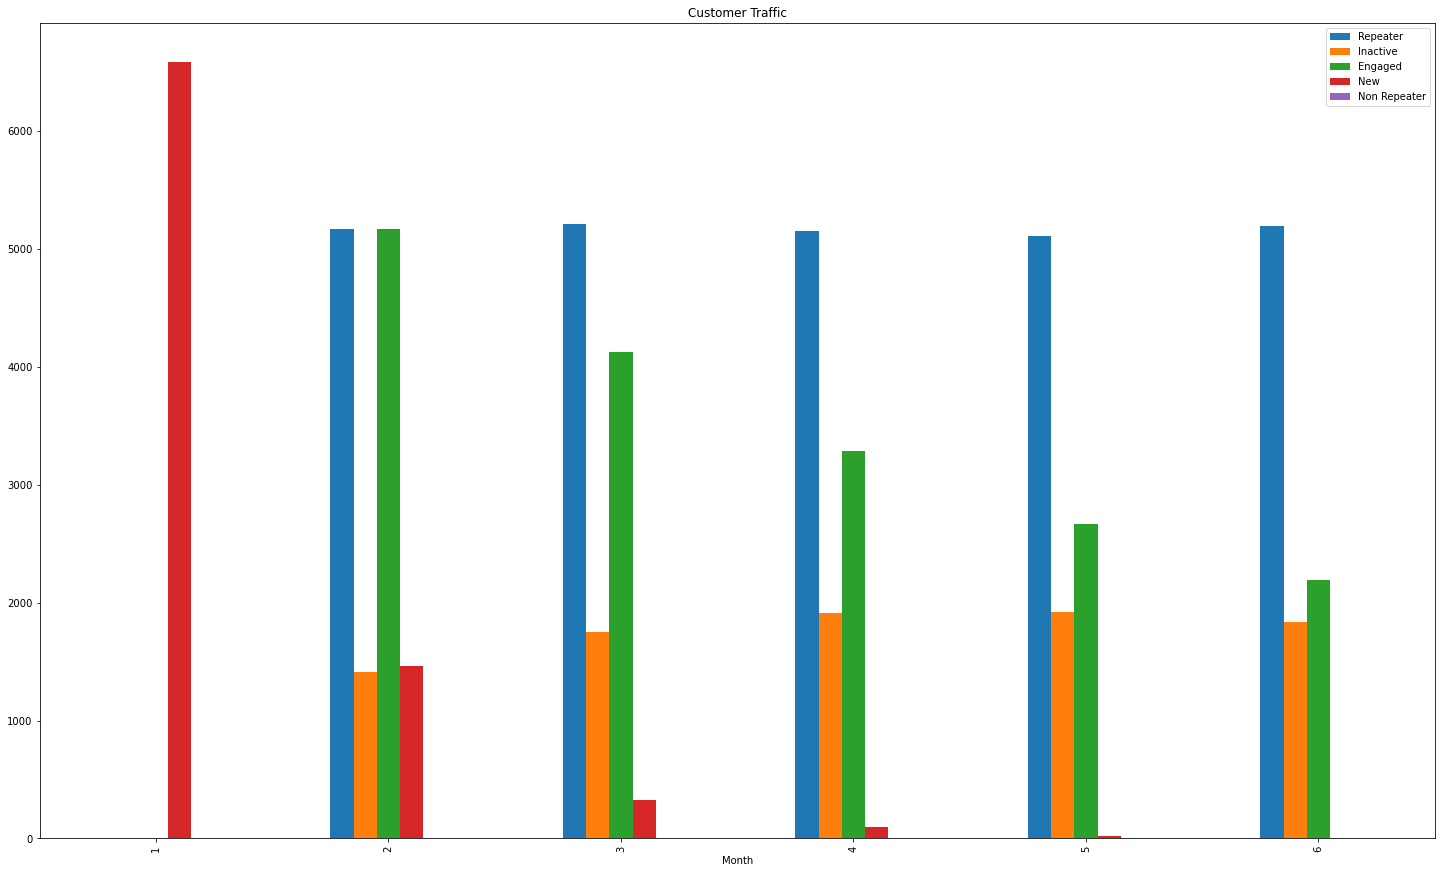

In [192]:
customerStatus_df.plot.bar(figsize=(25,15))
plt.title("Customer Traffic")

Text(0.5, 1.0, 'Non Repeater')

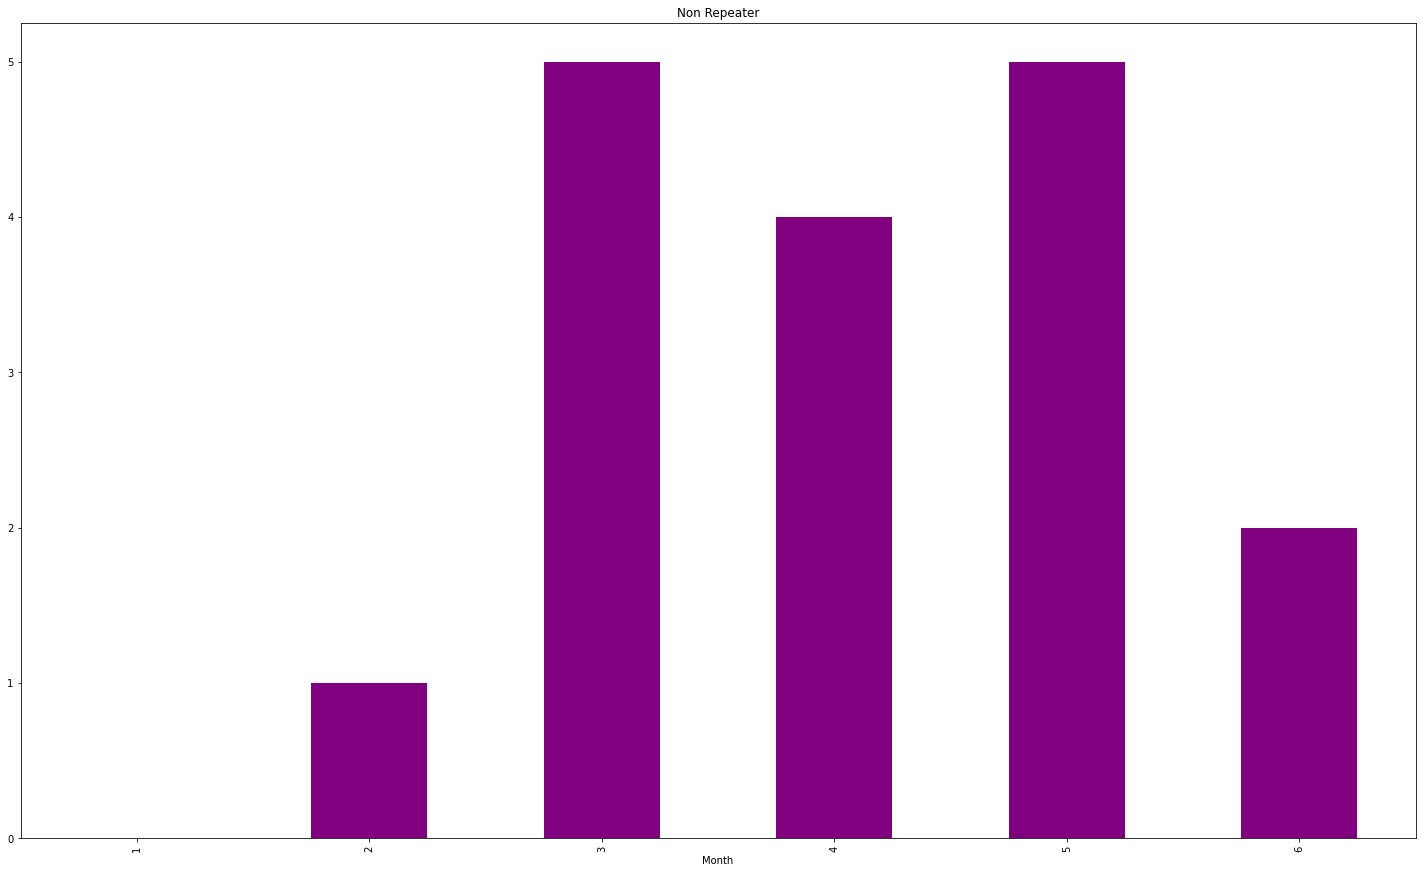

In [193]:
customerStatus_df["Non Repeater"].plot.bar(figsize=(25,15), color="purple")
plt.title("Non Repeater")

Text(0.5, 1.0, 'New')

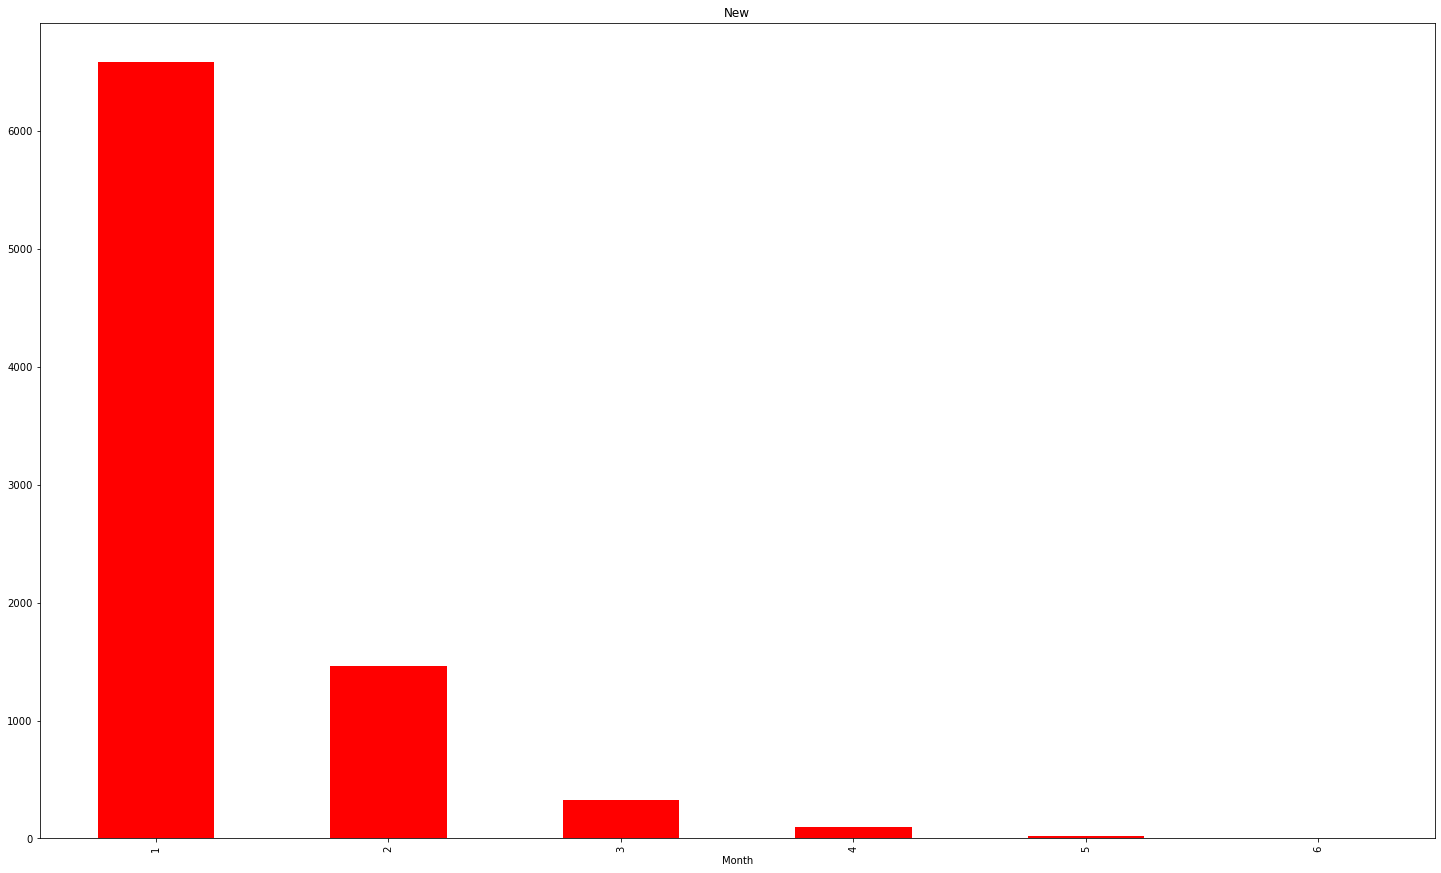

In [194]:
customerStatus_df["New"].plot.bar(figsize=(25,15), color="r")
plt.title("New")

Text(0.5, 1.0, 'Engaged')

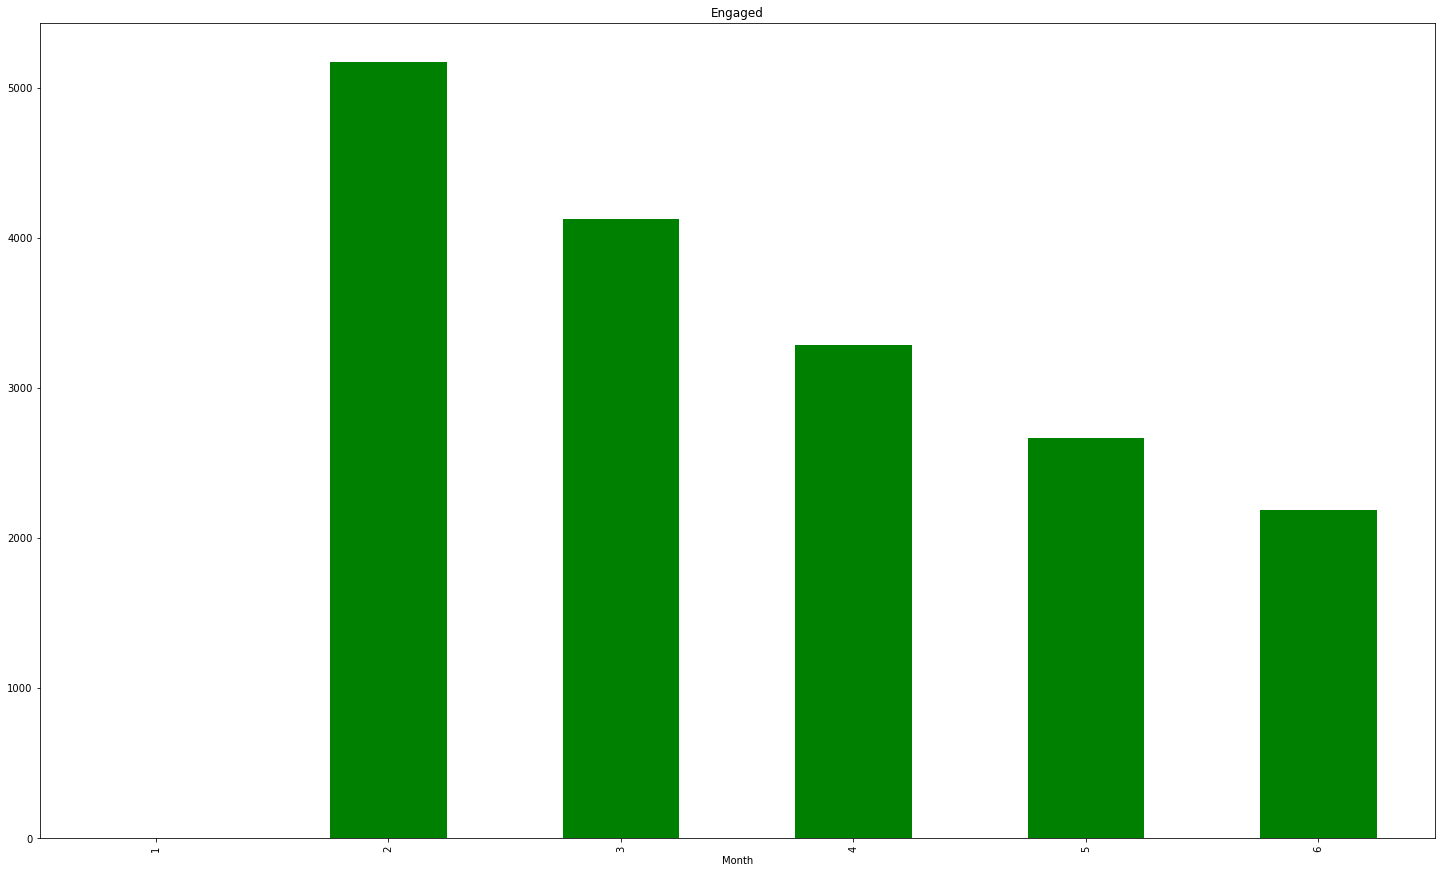

In [195]:
customerStatus_df["Engaged"].plot.bar(figsize=(25,15), color="g")
plt.title("Engaged")

Text(0.5, 1.0, 'Inactive')

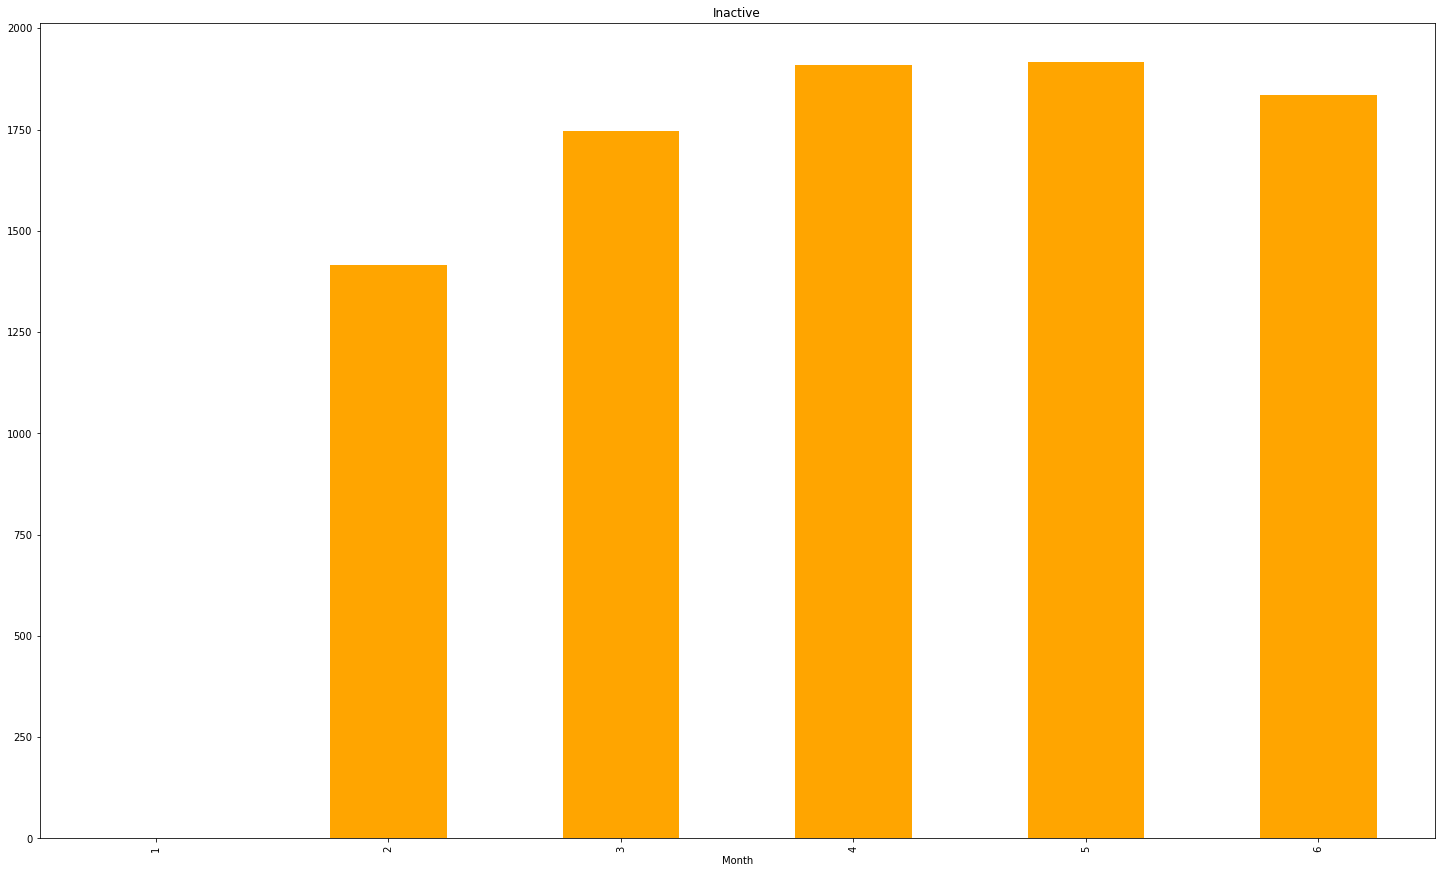

In [196]:
customerStatus_df["Inactive"].plot.bar(figsize=(25,15), color="orange")
plt.title("Inactive")

Text(0.5, 1.0, 'Repeater')

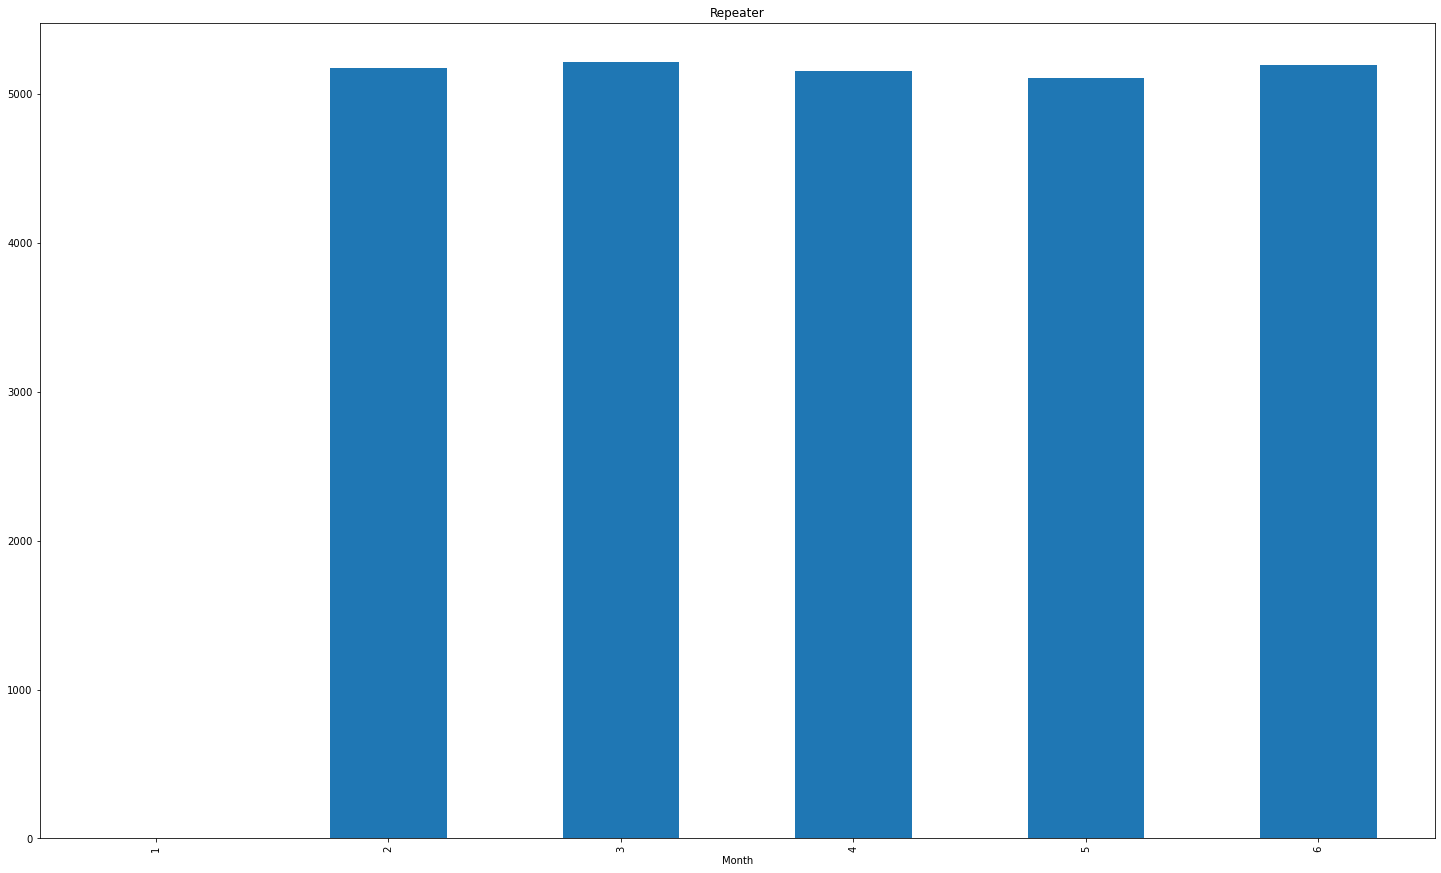

In [197]:
customerStatus_df["Repeater"].plot.bar(figsize=(25,15))
plt.title("Repeater")